In [1]:
# Imports
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import math
#from VSM_IBVS import VSM_IBVS as V_IBVS
from math import pi
np.set_printoptions(linewidth=120, formatter={'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})


from machinevisiontoolbox.base import *
from machinevisiontoolbox import *
from spatialmath.base import *
from spatialmath import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


### Load dataset

In [2]:
# Load dataset inputs and outputs
inputs = np.load('../dataset_generation/dataset/inputs_pbvs.npy')
outputs = np.load('../dataset_generation/dataset/outputs_pbvs.npy')

In [3]:
print('nputs shape:', inputs.shape)
print('outputs shape:', outputs.shape)

nputs shape: (3200, 6)
outputs shape: (3200, 6)


In [4]:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (2560, 6)
y_train shape: (2560, 6)
X_test shape: (640, 6)
y_test shape: (640, 6)


### Analyzing dataset

In [5]:
import numpy as np
import pandas as pd

# Assuming X_train and y_train are numpy arrays
data_summary = pd.DataFrame(X_train).describe()
velocity_summary = pd.DataFrame(y_train).describe()

print("Input Data Summary:")
print(data_summary)

print("\nOutput Data (Velocity) Summary:")
print(velocity_summary)

Input Data Summary:
                 0            1            2            3            4  \
count  2560.000000  2560.000000  2560.000000  2560.000000  2560.000000   
mean      0.007853    -0.052073     0.877372     0.015399     0.002857   
std       0.467504     0.392890     0.236794     0.406692     0.313990   
min      -2.152984    -2.120871     0.126439    -3.130623    -1.366227   
25%      -0.198671    -0.213319     0.741562    -0.160954    -0.143566   
50%       0.039672     0.001859     0.871329     0.026599     0.011237   
75%       0.250594     0.138306     0.994003     0.172295     0.135756   
max       1.732818     1.781945     1.995675     3.000980     1.510732   

                 5  
count  2560.000000  
mean      0.019706  
std       0.452666  
min      -2.977699  
25%      -0.170443  
50%      -0.018435  
75%       0.185175  
max       3.060685  

Output Data (Velocity) Summary:
                 0            1            2            3            4  \
count  2560.00000

In [6]:
import matplotlib.pyplot as plt

def features_hist(data, title, xlabel, ylabel):
    # Histogram of each feature of the input data
    plt.figure(figsize=(18, 12))
    for i in range(X_train.shape[1]):
        plt.subplot(3, 4, i+1)
        plt.hist(data[:, i], bins=50, alpha=0.7, label=f'Feature {i+1}')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title + f' {i+1}')
        plt.legend()
    plt.tight_layout()
    plt.show()

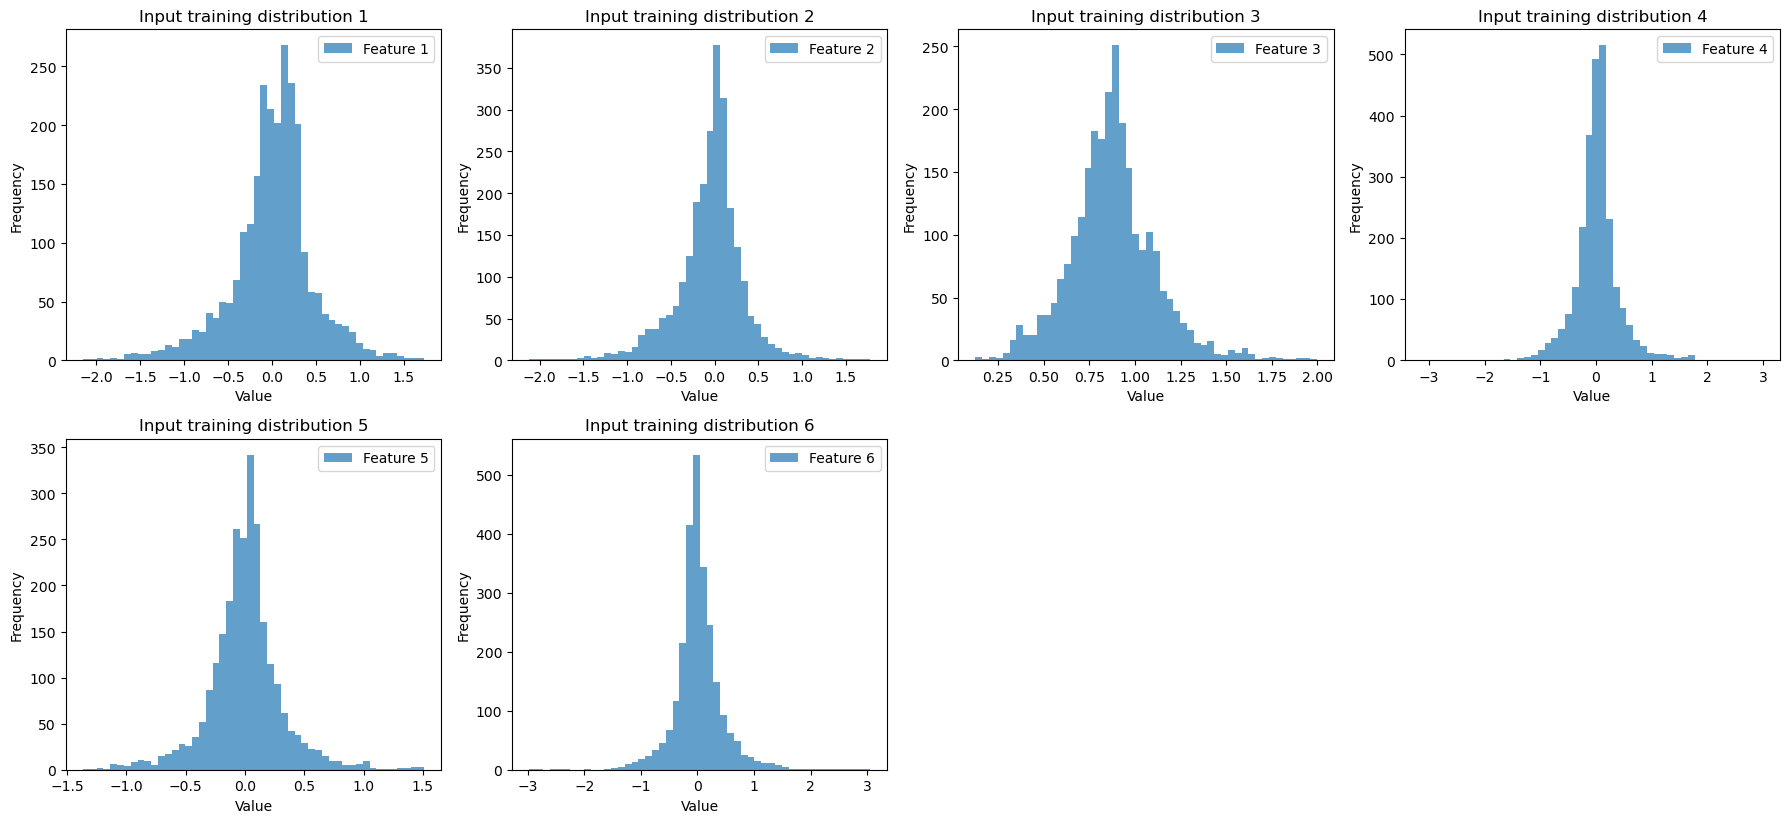

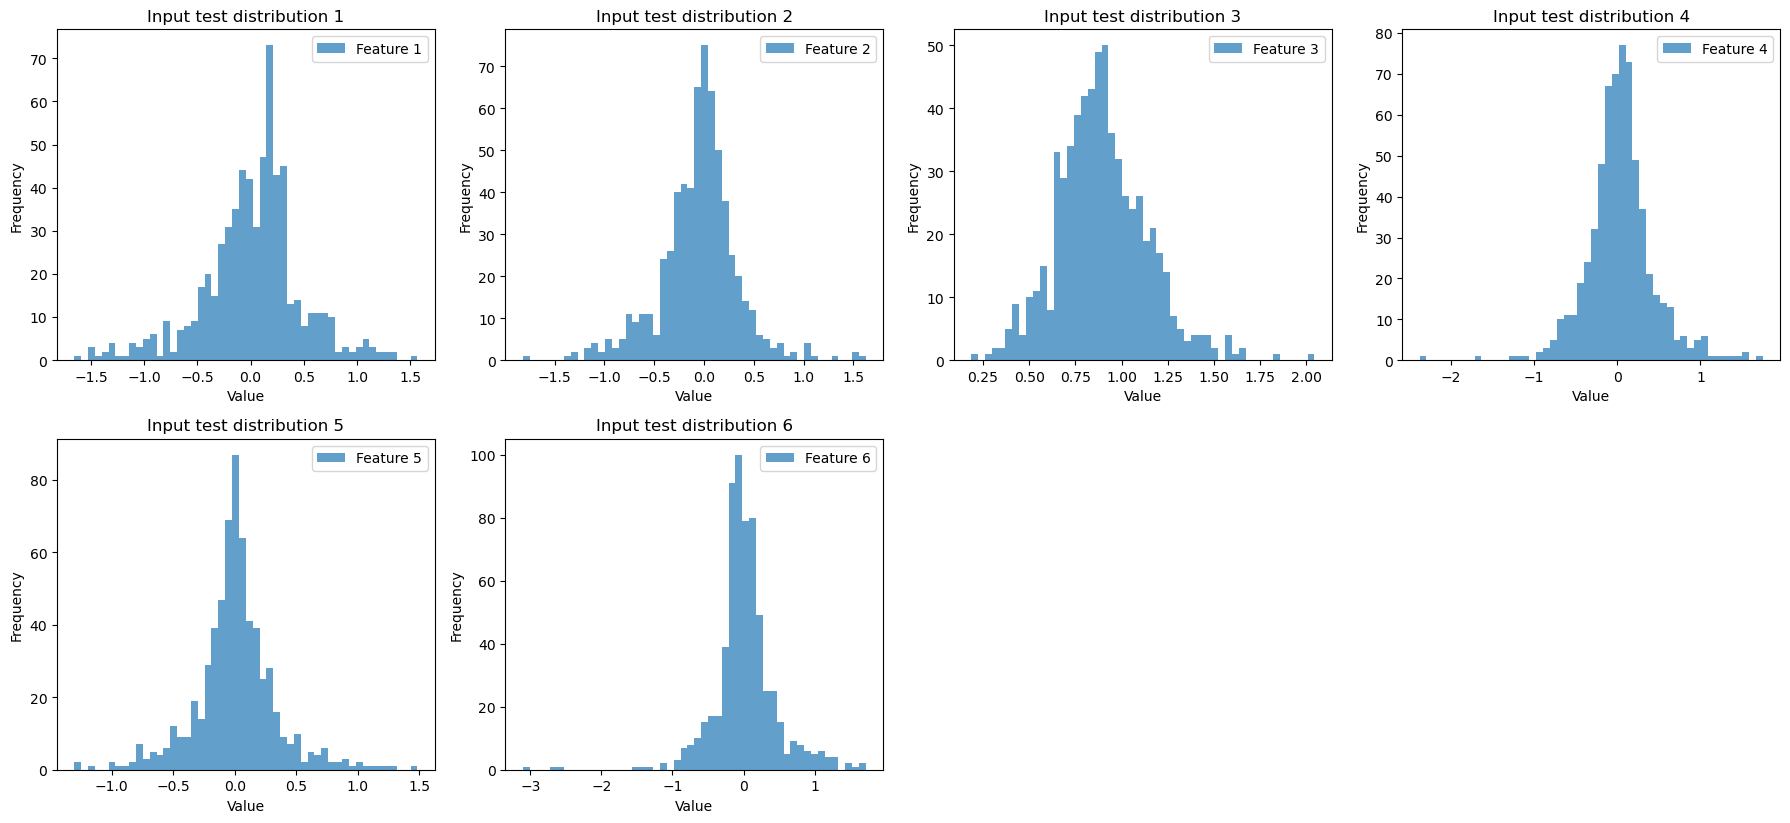

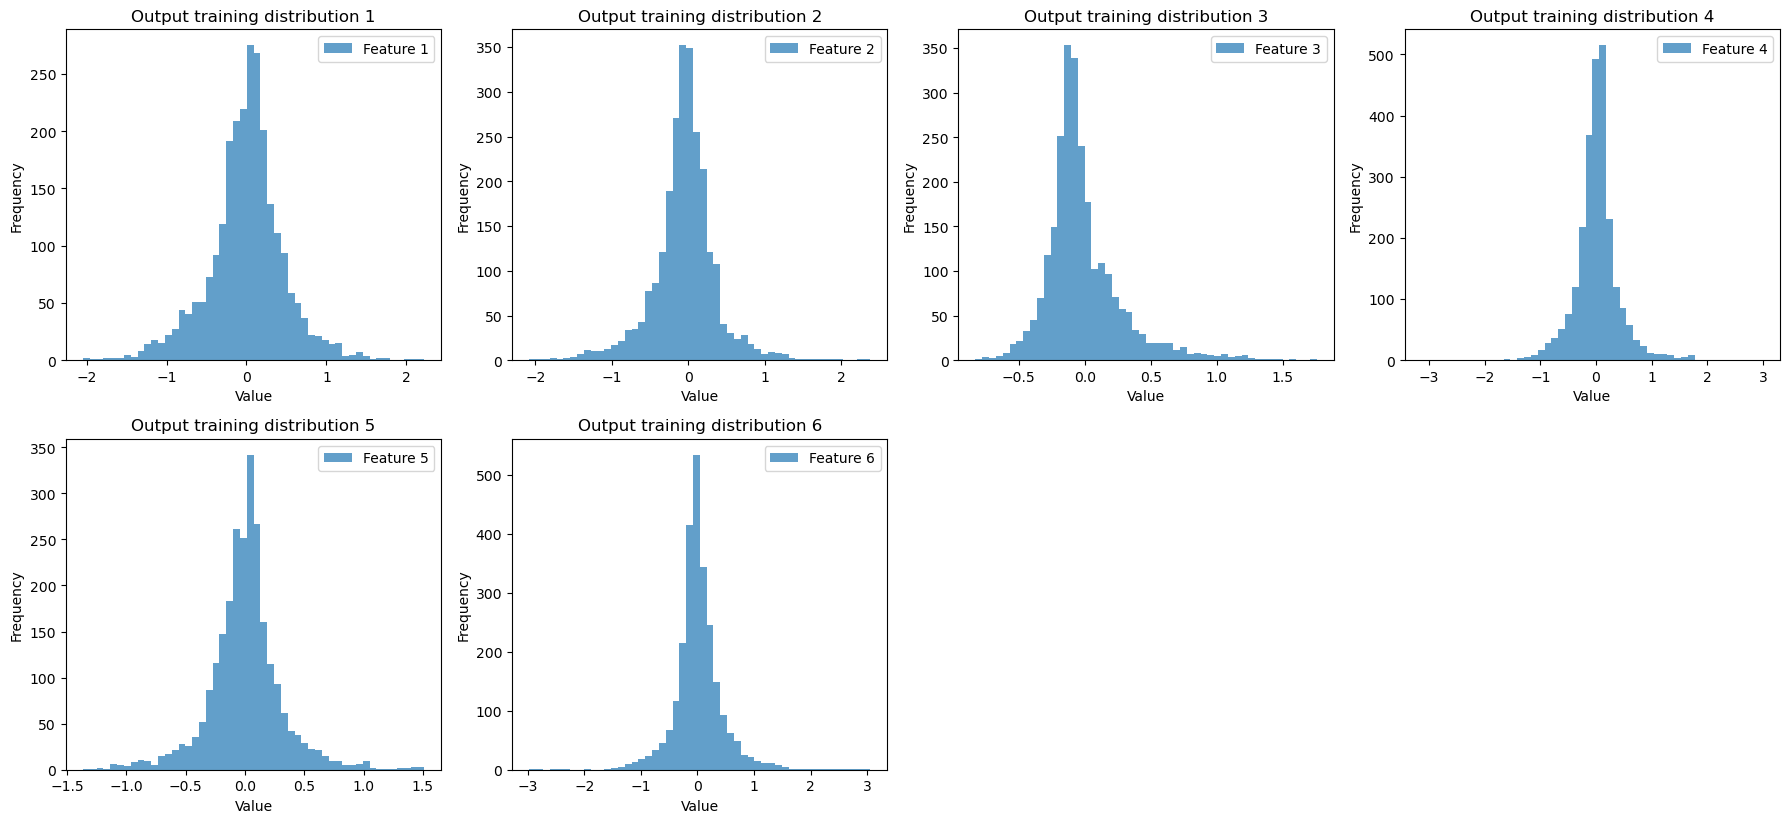

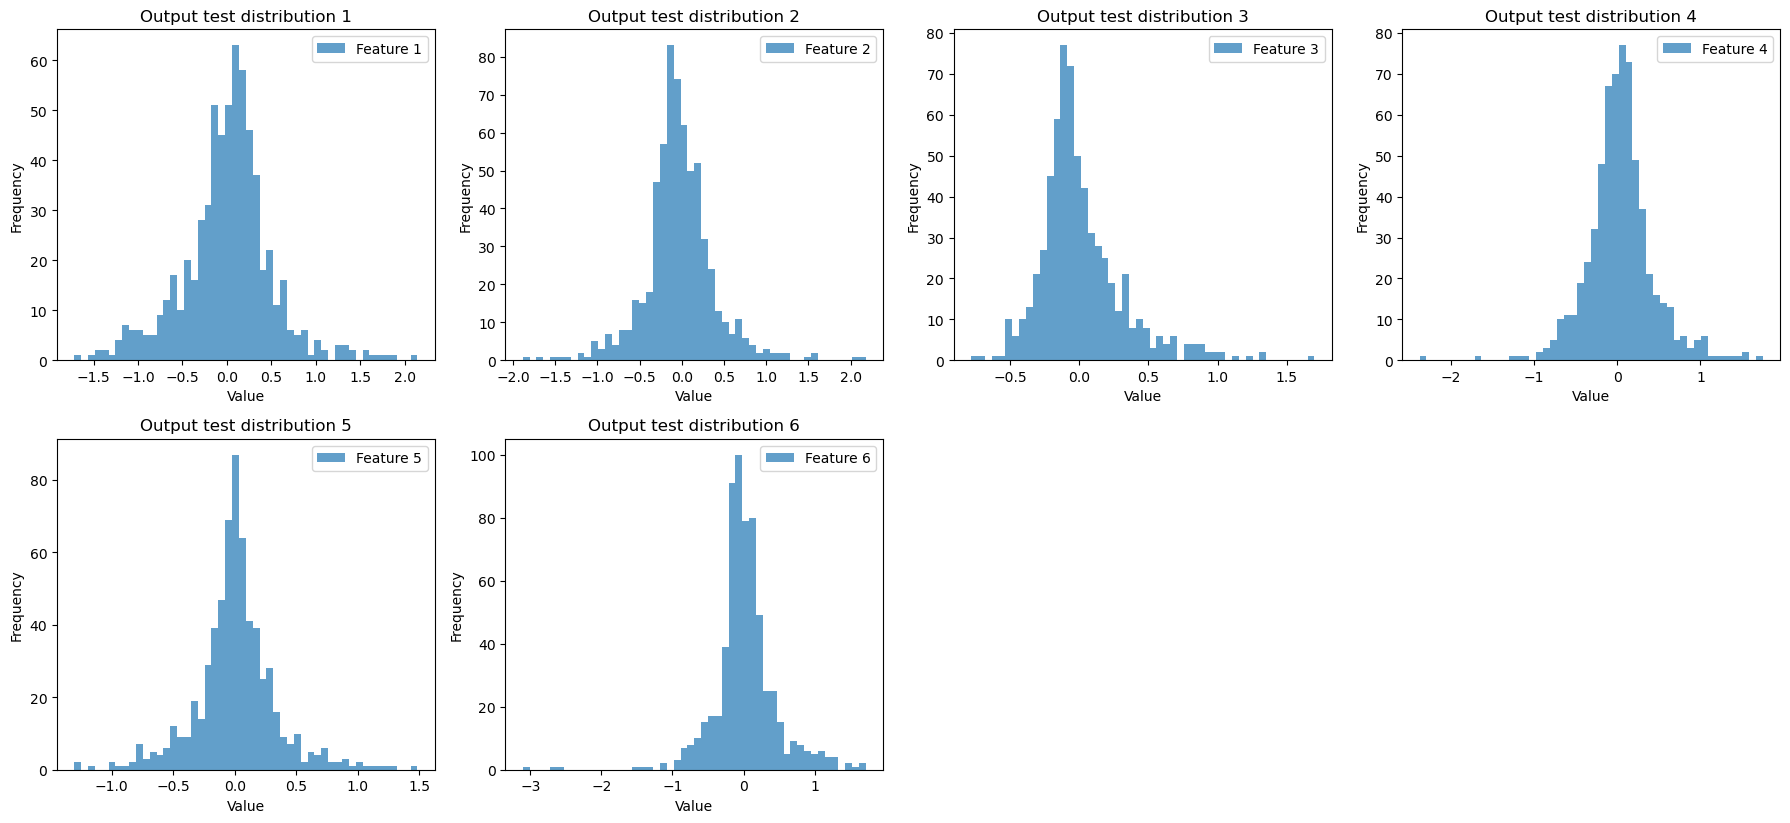

In [7]:
# Input and output data distributions
features_hist(X_train, 'Input training distribution', 'Value', 'Frequency')
features_hist(X_test, 'Input test distribution', 'Value', 'Frequency')
features_hist(y_train, 'Output training distribution', 'Value', 'Frequency')
features_hist(y_test, 'Output test distribution', 'Value', 'Frequency')

In [8]:
# print min and max values of the input and output data
print("Min value of input data:", X_train.min())
print("Max value of input data:", X_train.max())
print("Min value of output data:", y_train.min())
print("Max value of output data:", y_train.max())

Min value of input data: -3.130622684802638
Max value of input data: 3.060685110285127
Min value of output data: -3.130622684802638
Max value of output data: 3.060685110285127


### Model building

In [44]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

# Build the model
model = Sequential()
model.add(Input(shape=(6,)))  # Input layer

model.add(Dense(128, activation='relu'))  # Hidden layer
model.add(Dense(128, activation='relu'))  # Hidden layer
model.add(Dense(64, activation='relu'))  # Hidden layer

model.add(Dense(6))  # Output layer

### Train model

In [45]:
# Training the model
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import Accuracy, RootMeanSquaredError

# Define the RMSE loss function
def rmse_loss(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

model.compile(optimizer='adam',
                loss=MeanSquaredError(), 
                metrics=[RootMeanSquaredError()])
                
history = model.fit(X_train, 
          y_train,
          epochs=50, 
          batch_size=64, 
          validation_split=0.2)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1230 - root_mean_squared_error: 0.3489 - val_loss: 0.0260 - val_root_mean_squared_error: 0.1613
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - root_mean_squared_error: 0.1365 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1148
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - root_mean_squared_error: 0.0863 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0815
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - root_mean_squared_error: 0.0521 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0692
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - root_mean_squared_error: 0.0364 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0660
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - root_mean_squared_error: 0.0355 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0672
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.001

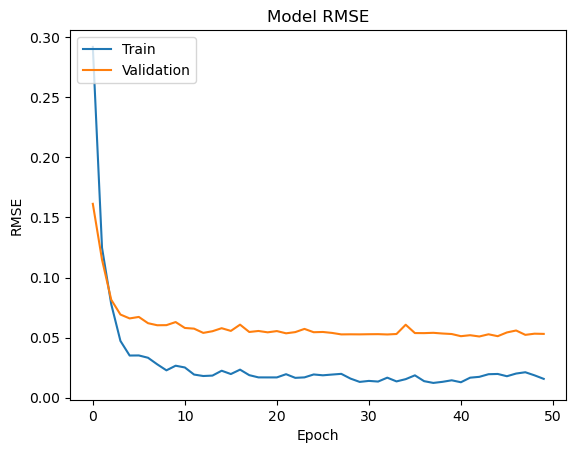

In [46]:
# Plot training and validation root mean squared error
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

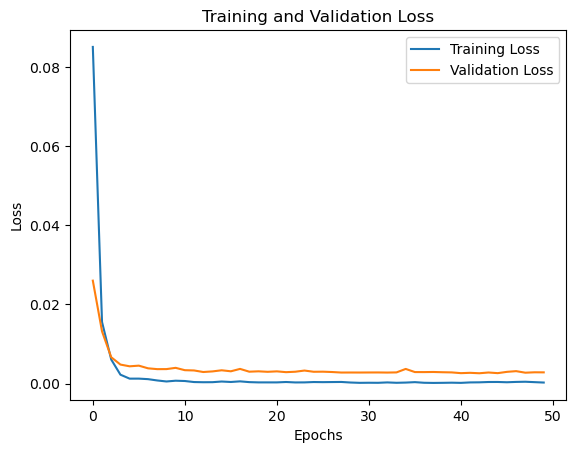

In [47]:
# Plot the training loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Validate the model

In [48]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8131e-04 - root_mean_squared_error: 0.0241  
Loss: 0.0006454793619923294


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


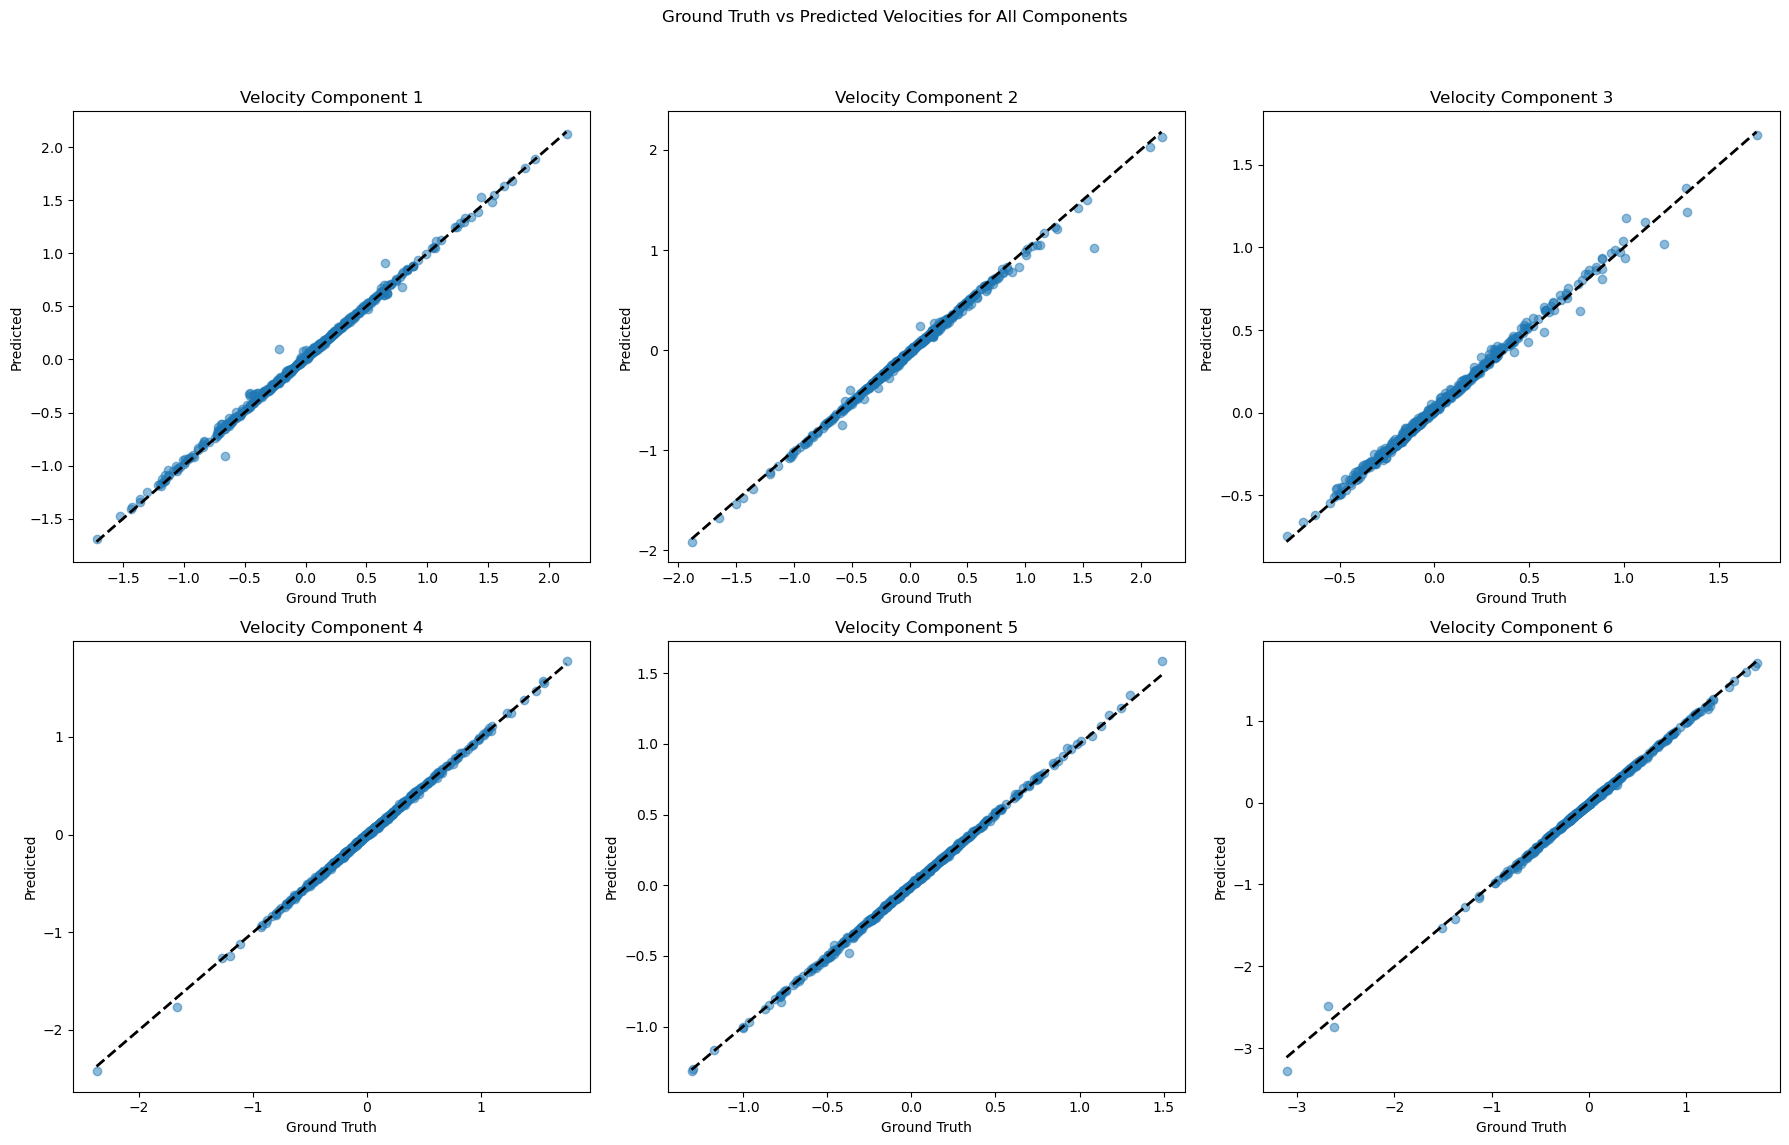

In [49]:
# Make one plot for each of the velocity components
y_pred = model.predict(X_test)

# Initialize a figure for a 2x3 grid of subplots
plt.figure(figsize=(18, 12))

for i in range(6):
    # Create subplot in a 2x3 grid
    plt.subplot(2, 3, i+1)
    # Plot the predicted and ground truth velocities
    plt.scatter(y_test[:, i], y_pred[:, i], alpha=0.5)
    plt.plot([y_test[:, i].min(), y_test[:, i].max()], [y_test[:, i].min(), y_test[:, i].max()], 'k--', lw=2)  # Add a line of y=x for reference
    plt.xlabel('Ground Truth')
    plt.ylabel('Predicted')
    plt.title(f'Velocity Component {i+1}')

plt.suptitle('Ground Truth vs Predicted Velocities for All Components')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.show()

### Save model

In [50]:
# Save model
model.save('models/uv_pstar.keras')